<a href="https://colab.research.google.com/github/joaopamaral/deep-learning-v2-pytorch/blob/master/project-dog-classification/dog_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](https://github.com/joaopamaral/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/sample_dog_output.png?raw=1)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home diretcory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [0]:
from tqdm.auto import tqdm

# Check if running in colab.research.google.com
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

In [4]:
# Download and extract files to colab
if IN_COLAB:
    !wget -nc -q https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
    !wget -nc -q https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip
    !unzip -q -o dogImages.zip
    !unzip -q -o lfw.zip
    
    from google.colab import drive
    drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

In [0]:
if IN_COLAB:
    !wget -nc -q https://raw.githubusercontent.com/joaopamaral/deep-learning-v2-pytorch/master/project-dog-classification/haarcascades/haarcascade_frontalface_alt.xml
    !mkdir -p haarcascades
    !mv -n haarcascade_frontalface_alt.xml haarcascades/haarcascade_frontalface_alt.xml

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

Number of faces detected: 1


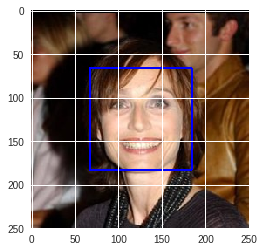

In [7]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

In [0]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [11]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
face_detector_vec = np.vectorize(face_detector)

perf_human = face_detector_vec(human_files_short).sum() / human_files_short.size
perf_dog = face_detector_vec(dog_files_short).sum() / dog_files_short.size

print(f'Performance of the face_detector algorithm on the images in human_files_short: {perf_human*100:.0f}%')
print(f'Performance of the face_detector algorithm on the images in dog_files_short: {perf_dog*100:.0f}%')

Performance of the face_detector algorithm on the images in human_files_short: 99%
Performance of the face_detector algorithm on the images in dog_files_short: 11%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [0]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [12]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
553433881it [00:06, 88014055.62it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [0]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    image = Image.open(img_path).convert('RGB')
    
    transform = transforms.Compose([transforms.Resize((224, 224)),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.485, 0.456, 0.406), 
                                                         (0.229, 0.224, 0.225))])
    
    # discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = transform(image)[:3,:,:].unsqueeze(0)
    
    # move image to GPU if CUDA is available
    if use_cuda:
        image = image.cuda()

    output = VGG16(image)
    _, pred = torch.max(output, 1)
    
    return pred.item() # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [0]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    idx = VGG16_predict(img_path)
    
    return (idx >= 151) and (idx <= 268) # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [15]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
dog_detector_vec = np.vectorize(dog_detector)

perf_human = dog_detector_vec(human_files_short).sum() / human_files_short.size
dog_human = dog_detector_vec(dog_files_short).sum() / dog_files_short.size

print(f'Performance of the dog_detector algorithm on the images in human_files_short: {perf_human*100:.0f}%')
print(f'Performance of the dog_detector algorithm on the images in dog_files_short: {dog_human*100:.0f}%')

Performance of the dog_detector algorithm on the images in human_files_short: 0%
Performance of the dog_detector algorithm on the images in dog_files_short: 100%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [0]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="https://github.com/joaopamaral/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/Brittany_02625.jpg?raw=1" width="100"> | <img src="https://github.com/joaopamaral/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/Welsh_springer_spaniel_08203.jpg?raw=1" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="https://github.com/joaopamaral/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/Curly-coated_retriever_03896.jpg?raw=1" width="200"> | <img src="https://github.com/joaopamaral/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/American_water_spaniel_00648.jpg?raw=1" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="https://github.com/joaopamaral/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/Labrador_retriever_06457.jpg?raw=1" width="150"> | <img src="https://github.com/joaopamaral/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/Labrador_retriever_06455.jpg?raw=1" width="240"> | <img src="https://github.com/joaopamaral/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/Labrador_retriever_06449.jpg?raw=1" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [0]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# number of subprocesses to use for data loading
num_workers = 8
# how many samples per batch to load
batch_size = 64

# VGG - image normalization
mean = np.array((0.485, 0.456, 0.406))
std = np.array((0.229, 0.224, 0.225))

# convert data to a normalized torch.FloatTensor
training_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.Resize(224), 
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)])

valid_test_transform = transforms.Compose([transforms.Resize(224), 
                                           transforms.CenterCrop(224), 
                                           transforms.ToTensor(),
                                           transforms.Normalize(mean, std)])

data_dir = 'dogImages'
train_dir = data_dir + '/train/'
valid_dir = data_dir + '/valid/'
test_dir = data_dir + '/test/'

# choose the training, validation and test datasets
train_data = datasets.ImageFolder(train_dir, transform=training_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=valid_test_transform)
test_data = datasets.ImageFolder(test_dir, transform=valid_test_transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)

loaders_scratch = {'train': train_loader,
                   'valid': valid_loader,
                   'test': test_loader}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:


*   My code, first of all, resize the image to 224 (if the image is not square, only the smaller side will be with 224), after that, I make a center crop of 224x224 to garantee the size expected to my CNN. I choose this size because it's not too big size (will generate less weights to be updated during the training) and it's a size that already used by the models that were trained in ImageNet dataset.
*   I decided to use RandomHorizontalFlip and RandomRotation (10 degree). I choose only this two tranformations because the vertical flip I thought was exagerated (it's almost impossible that appears a photo of a dog up side down), and if I use a bigger degree to rotate the image, the black boards can appear in the corner of the image, and I don't want this for the training image (I think this could be harm to the training).



### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [0]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        # Convolutional Layers
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
            
        self.pool = nn.MaxPool2d(2, 2)
        
        # linear layers
        self.fc1 = nn.Linear(128 * 14 * 14, 2048)
        self.fc2 = nn.Linear(2048, 1024)
        self.fc3 = nn.Linear(1024, 512)
        self.fc4 = nn.Linear(512, 133)
        
        # dropout layer
        self.dropout = nn.Dropout(0.4)
    
    def forward(self, x):
        ## Define forward behavior
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        
        # flatten image input
        x = x.view(-1, 128 * 14 * 14)
        
        # add linear layers sequence
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

I choosed a CNN with 4 convolutional layers and max pooling (to decresse the image by half) in each layer (this decrease the image size to only 14x14 after the 4 layers). The final depth is 128 (after some attempts I found this value that produced some good results). The dogs images is realy easy to mistake, so a 4 convolutional layers with 16, 32, 64 and 128 depth made a good job.

For the fully connected layer, I choosed an input layer with 2048 nodes (less than the number of features generated by the convolutional layer), two hidden layers with 1024 and 512 nodes respective, and and output layer with 133 nodes (the number of possible output classes).

Finally, I put a dropout after each layer of fully connected layer so to avoid overfit.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [0]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adadelta(model_scratch.parameters())

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [0]:
from tqdm.auto import tqdm

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        valid_correct = 0
        valid_total = 0
        valid_acc = 0
        
        ###################
        # train the model #
        ###################
        model.train()
        training_progress_bar = tqdm(loaders['train'], desc=f'T{epoch}', unit='batches')
        for batch_idx, (data, target) in enumerate(training_progress_bar):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
                                              
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            training_progress_bar.set_description(f'T{epoch}-{train_loss:6f}')
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        validation_progress_bar = tqdm(loaders['valid'], desc=f'V{epoch}', unit='batches')
        for batch_idx, (data, target) in enumerate(validation_progress_bar):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # convert output probabilities to predicted class
            _, pred = torch.max(output, 1)
            # compare predictions to true label
            valid_correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
            valid_total += target.size(0)
            valid_acc = float(valid_correct)/float(valid_total)
            # update average validation loss 
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
            validation_progress_bar.set_description(f'V{epoch}-{valid_acc*100:6f}')

            
        # print training/validation statistics 
        print(f'Epoch: {epoch} \tTraining Loss: {train_loss:.6f} \tValidation Loss: {valid_loss:.6f} \t Validation Accuracy: {valid_acc*100:6f}%')
        
        ## TODO: save the model if validation loss has decreased
        # save model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print(f'Validation loss decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}).  Saving model ...')
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model

In [0]:
# train the model
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')


Epoch: 1 	Training Loss: 4.884572 	Validation Loss: 4.878372 	 Validation Accuracy: 1.197605%
Validation loss decreased (inf --> 4.878372).  Saving model ...



Epoch: 2 	Training Loss: 4.830101 	Validation Loss: 4.857597 	 Validation Accuracy: 1.437126%
Validation loss decreased (4.878372 --> 4.857597).  Saving model ...



Epoch: 3 	Training Loss: 4.724946 	Validation Loss: 4.640058 	 Validation Accuracy: 1.676647%
Validation loss decreased (4.857597 --> 4.640058).  Saving model ...



Epoch: 4 	Training Loss: 4.653470 	Validation Loss: 4.671671 	 Validation Accuracy: 1.796407%



Epoch: 5 	Training Loss: 4.613235 	Validation Loss: 4.556449 	 Validation Accuracy: 1.916168%
Validation loss decreased (4.640058 --> 4.556449).  Saving model ...



Epoch: 6 	Training Loss: 4.516132 	Validation Loss: 4.465421 	 Validation Accuracy: 2.994012%
Validation loss decreased (4.556449 --> 4.465421).  Saving model ...



Epoch: 7 	Training Loss: 4.387758 	Validation Loss: 4.559146 	 Validation Accuracy: 3.113772%



Epoch: 8 	Training Loss: 4.316362 	Validation Loss: 4.432038 	 Validation Accuracy: 4.311377%
Validation loss decreased (4.465421 --> 4.432038).  Saving model ...



Epoch: 9 	Training Loss: 4.219552 	Validation Loss: 4.150795 	 Validation Accuracy: 4.670659%
Validation loss decreased (4.432038 --> 4.150795).  Saving model ...



Epoch: 10 	Training Loss: 4.138326 	Validation Loss: 4.116756 	 Validation Accuracy: 5.508982%
Validation loss decreased (4.150795 --> 4.116756).  Saving model ...



Epoch: 11 	Training Loss: 4.057135 	Validation Loss: 4.218269 	 Validation Accuracy: 6.586826%



Epoch: 12 	Training Loss: 3.966682 	Validation Loss: 4.602072 	 Validation Accuracy: 5.149701%



Epoch: 13 	Training Loss: 3.916549 	Validation Loss: 4.217490 	 Validation Accuracy: 5.748503%



Epoch: 14 	Training Loss: 3.823146 	Validation Loss: 3.866114 	 Validation Accuracy: 8.742515%
Validation loss decreased (4.116756 --> 3.866114).  Saving model ...



Epoch: 15 	Training Loss: 3.742451 	Validation Loss: 4.017364 	 Validation Accuracy: 6.706587%



Epoch: 16 	Training Loss: 3.682194 	Validation Loss: 3.863032 	 Validation Accuracy: 7.664671%
Validation loss decreased (3.866114 --> 3.863032).  Saving model ...



Epoch: 17 	Training Loss: 3.599155 	Validation Loss: 4.122162 	 Validation Accuracy: 7.544910%



Epoch: 18 	Training Loss: 3.518413 	Validation Loss: 3.773386 	 Validation Accuracy: 9.700599%
Validation loss decreased (3.863032 --> 3.773386).  Saving model ...



Epoch: 19 	Training Loss: 3.450082 	Validation Loss: 3.728159 	 Validation Accuracy: 10.778443%
Validation loss decreased (3.773386 --> 3.728159).  Saving model ...



Epoch: 20 	Training Loss: 3.358313 	Validation Loss: 4.061447 	 Validation Accuracy: 8.622754%



Epoch: 21 	Training Loss: 3.258210 	Validation Loss: 3.906399 	 Validation Accuracy: 10.059880%



Epoch: 22 	Training Loss: 3.176546 	Validation Loss: 3.710982 	 Validation Accuracy: 11.257485%
Validation loss decreased (3.728159 --> 3.710982).  Saving model ...



Epoch: 23 	Training Loss: 3.080538 	Validation Loss: 3.687300 	 Validation Accuracy: 13.293413%
Validation loss decreased (3.710982 --> 3.687300).  Saving model ...



Epoch: 24 	Training Loss: 2.974257 	Validation Loss: 4.027305 	 Validation Accuracy: 11.736527%



Epoch: 25 	Training Loss: 2.880501 	Validation Loss: 3.708812 	 Validation Accuracy: 16.167665%



Epoch: 26 	Training Loss: 2.789389 	Validation Loss: 3.694870 	 Validation Accuracy: 12.694611%



Epoch: 27 	Training Loss: 2.673069 	Validation Loss: 3.826123 	 Validation Accuracy: 14.011976%



Epoch: 28 	Training Loss: 2.566575 	Validation Loss: 3.819780 	 Validation Accuracy: 14.371257%



Epoch: 29 	Training Loss: 2.475788 	Validation Loss: 3.735241 	 Validation Accuracy: 15.089820%



Epoch: 30 	Training Loss: 2.362331 	Validation Loss: 3.785849 	 Validation Accuracy: 14.850299%



Epoch: 31 	Training Loss: 2.252081 	Validation Loss: 3.814534 	 Validation Accuracy: 15.808383%



Epoch: 32 	Training Loss: 2.195171 	Validation Loss: 3.836867 	 Validation Accuracy: 15.928144%



Epoch: 33 	Training Loss: 2.098435 	Validation Loss: 3.983353 	 Validation Accuracy: 16.167665%



Epoch: 34 	Training Loss: 1.989668 	Validation Loss: 3.881093 	 Validation Accuracy: 16.766467%



Epoch: 35 	Training Loss: 1.896685 	Validation Loss: 3.976196 	 Validation Accuracy: 15.928144%



Epoch: 36 	Training Loss: 1.835514 	Validation Loss: 3.778356 	 Validation Accuracy: 16.526946%



Epoch: 37 	Training Loss: 1.739751 	Validation Loss: 3.953840 	 Validation Accuracy: 16.407186%



Epoch: 38 	Training Loss: 1.643907 	Validation Loss: 3.976100 	 Validation Accuracy: 16.886228%



Epoch: 39 	Training Loss: 1.538999 	Validation Loss: 4.220974 	 Validation Accuracy: 16.167665%



Epoch: 40 	Training Loss: 1.545865 	Validation Loss: 4.624157 	 Validation Accuracy: 12.335329%



Epoch: 41 	Training Loss: 1.428543 	Validation Loss: 4.341985 	 Validation Accuracy: 14.011976%



Epoch: 42 	Training Loss: 1.372973 	Validation Loss: 4.171270 	 Validation Accuracy: 17.005988%



Epoch: 43 	Training Loss: 1.327808 	Validation Loss: 4.202311 	 Validation Accuracy: 16.047904%



Epoch: 44 	Training Loss: 1.236640 	Validation Loss: 4.495213 	 Validation Accuracy: 16.646707%



Epoch: 45 	Training Loss: 1.172486 	Validation Loss: 4.241789 	 Validation Accuracy: 16.167665%



Epoch: 46 	Training Loss: 1.127921 	Validation Loss: 4.132568 	 Validation Accuracy: 15.449102%



Epoch: 47 	Training Loss: 1.083007 	Validation Loss: 4.511104 	 Validation Accuracy: 17.125749%



Epoch: 48 	Training Loss: 1.034475 	Validation Loss: 4.287233 	 Validation Accuracy: 17.485030%



Epoch: 49 	Training Loss: 1.027280 	Validation Loss: 4.510449 	 Validation Accuracy: 15.329341%



Epoch: 50 	Training Loss: 0.962718 	Validation Loss: 4.739288 	 Validation Accuracy: 16.646707%



Epoch: 51 	Training Loss: 0.937681 	Validation Loss: 4.386880 	 Validation Accuracy: 16.766467%



Epoch: 52 	Training Loss: 0.895281 	Validation Loss: 4.707536 	 Validation Accuracy: 15.329341%



Epoch: 53 	Training Loss: 0.854318 	Validation Loss: 4.449237 	 Validation Accuracy: 15.808383%



Epoch: 54 	Training Loss: 0.809909 	Validation Loss: 4.421592 	 Validation Accuracy: 15.449102%



Epoch: 55 	Training Loss: 0.785054 	Validation Loss: 5.162341 	 Validation Accuracy: 17.125749%



Epoch: 56 	Training Loss: 0.758687 	Validation Loss: 4.460667 	 Validation Accuracy: 17.604790%



Epoch: 57 	Training Loss: 0.769801 	Validation Loss: 4.361442 	 Validation Accuracy: 17.604790%



Epoch: 58 	Training Loss: 0.732411 	Validation Loss: 4.245535 	 Validation Accuracy: 17.005988%



Epoch: 59 	Training Loss: 0.699336 	Validation Loss: 4.527374 	 Validation Accuracy: 18.682635%



Epoch: 60 	Training Loss: 0.659049 	Validation Loss: 4.582076 	 Validation Accuracy: 19.041916%



Epoch: 61 	Training Loss: 0.647388 	Validation Loss: 4.711990 	 Validation Accuracy: 17.365269%



Epoch: 62 	Training Loss: 0.644297 	Validation Loss: 4.546981 	 Validation Accuracy: 17.245509%



Epoch: 63 	Training Loss: 0.632105 	Validation Loss: 4.648056 	 Validation Accuracy: 15.928144%



Epoch: 64 	Training Loss: 0.606622 	Validation Loss: 4.546048 	 Validation Accuracy: 18.562874%



Epoch: 65 	Training Loss: 0.615368 	Validation Loss: 4.688653 	 Validation Accuracy: 19.401198%



Epoch: 66 	Training Loss: 0.554115 	Validation Loss: 4.767318 	 Validation Accuracy: 18.083832%



Epoch: 67 	Training Loss: 0.569414 	Validation Loss: 5.151463 	 Validation Accuracy: 18.203593%



Epoch: 68 	Training Loss: 0.561787 	Validation Loss: 5.030437 	 Validation Accuracy: 12.814371%



Epoch: 69 	Training Loss: 0.497957 	Validation Loss: 4.530064 	 Validation Accuracy: 18.922156%



Epoch: 70 	Training Loss: 0.542695 	Validation Loss: 4.925959 	 Validation Accuracy: 19.640719%



Epoch: 71 	Training Loss: 0.521768 	Validation Loss: 4.742132 	 Validation Accuracy: 19.041916%



Epoch: 72 	Training Loss: 0.509673 	Validation Loss: 4.458731 	 Validation Accuracy: 20.119760%



Epoch: 73 	Training Loss: 0.483589 	Validation Loss: 5.122737 	 Validation Accuracy: 18.203593%



Epoch: 74 	Training Loss: 0.490938 	Validation Loss: 4.820999 	 Validation Accuracy: 16.047904%



Epoch: 75 	Training Loss: 0.471961 	Validation Loss: 4.651816 	 Validation Accuracy: 19.640719%



Epoch: 76 	Training Loss: 0.458929 	Validation Loss: 4.622746 	 Validation Accuracy: 18.083832%



Epoch: 77 	Training Loss: 0.453566 	Validation Loss: 4.978116 	 Validation Accuracy: 19.401198%



Epoch: 78 	Training Loss: 0.423095 	Validation Loss: 4.923986 	 Validation Accuracy: 19.161677%



Epoch: 79 	Training Loss: 0.472743 	Validation Loss: 4.715837 	 Validation Accuracy: 16.646707%



Epoch: 80 	Training Loss: 0.425117 	Validation Loss: 5.194950 	 Validation Accuracy: 19.401198%



Epoch: 81 	Training Loss: 0.415182 	Validation Loss: 5.368842 	 Validation Accuracy: 17.365269%



Epoch: 82 	Training Loss: 0.452394 	Validation Loss: 4.504871 	 Validation Accuracy: 16.526946%



Epoch: 83 	Training Loss: 0.428617 	Validation Loss: 5.075680 	 Validation Accuracy: 19.520958%



Epoch: 84 	Training Loss: 0.407141 	Validation Loss: 4.903249 	 Validation Accuracy: 17.844311%



Epoch: 85 	Training Loss: 0.425933 	Validation Loss: 4.978556 	 Validation Accuracy: 16.287425%



Epoch: 86 	Training Loss: 0.397080 	Validation Loss: 4.996066 	 Validation Accuracy: 19.520958%



Epoch: 87 	Training Loss: 0.401541 	Validation Loss: 4.743405 	 Validation Accuracy: 18.203593%



Epoch: 88 	Training Loss: 0.381251 	Validation Loss: 5.271597 	 Validation Accuracy: 17.485030%



Epoch: 89 	Training Loss: 0.409800 	Validation Loss: 5.073013 	 Validation Accuracy: 20.239521%



Epoch: 90 	Training Loss: 0.412323 	Validation Loss: 4.987748 	 Validation Accuracy: 18.562874%



Epoch: 91 	Training Loss: 0.333359 	Validation Loss: 4.837733 	 Validation Accuracy: 20.479042%



Epoch: 92 	Training Loss: 0.330183 	Validation Loss: 4.932667 	 Validation Accuracy: 18.443114%



Epoch: 93 	Training Loss: 0.382278 	Validation Loss: 4.954420 	 Validation Accuracy: 17.844311%



Epoch: 94 	Training Loss: 0.382353 	Validation Loss: 4.305524 	 Validation Accuracy: 20.000000%



Epoch: 95 	Training Loss: 0.369534 	Validation Loss: 4.829369 	 Validation Accuracy: 18.562874%



Epoch: 96 	Training Loss: 0.356102 	Validation Loss: 4.484375 	 Validation Accuracy: 19.880240%



Epoch: 97 	Training Loss: 0.327701 	Validation Loss: 5.007525 	 Validation Accuracy: 16.407186%



Epoch: 98 	Training Loss: 0.359195 	Validation Loss: 5.005444 	 Validation Accuracy: 19.640719%



Epoch: 99 	Training Loss: 0.356811 	Validation Loss: 4.658076 	 Validation Accuracy: 19.640719%



Epoch: 100 	Training Loss: 0.335508 	Validation Loss: 4.674644 	 Validation Accuracy: 18.203593%


In [20]:
# load the model that got the best validation accuracy
try:
    model_scratch.load_state_dict(torch.load('model_scratch.pt'))
    print('Local Model Scratch loaded!')
#     !cp -n model_scratch.pt 'gdrive/My Drive/Nanodegree DL/Project_2/model_scratch.pt'
#     print('Local Model Scratch saved to Google Drive!')
except:
    print('No local Model Scratch were found!')
    
if IN_COLAB:
    model_scratch.load_state_dict(torch.load('gdrive/My Drive/Nanodegree DL/Project_2/model_scratch.pt'))
    print('Model Scratch on Google Drive loaded!')

No local Model Scratch were found!
Model Scratch on Google Drive loaded!


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [21]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.755941


Test Accuracy: 15% (128/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [0]:
## TODO: Specify data loaders
# convert data to a normalized torch.FloatTensor
training_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.Resize(224), 
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)])

valid_test_transform = transforms.Compose([transforms.Resize(224), 
                                           transforms.CenterCrop(224), 
                                           transforms.ToTensor(),
                                           transforms.Normalize(mean, std)])

# choose the training, validation and test datasets
train_data = datasets.ImageFolder(train_dir, transform=training_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=valid_test_transform)
test_data = datasets.ImageFolder(test_dir, transform=valid_test_transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)

loaders_transfer = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [23]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.resnet152(pretrained=True)

# Freeze training for all "features" layers
for param in model_transfer.parameters():
    param.requires_grad = False
    
# Set new fully connected layer (fc)
model_transfer.fc = nn.Sequential(nn.Linear(model_transfer.fc.in_features, 512),
                                  nn.ReLU(),
                                  nn.Dropout(0.4),
                                  nn.Linear(512, 256),
                                  nn.ReLU(),
                                  nn.Dropout(0.4),
                                  nn.Linear(256, 133))


if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.torch/models/resnet152-b121ed2d.pth
241530880it [00:02, 91789984.83it/s]


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

I choosed to use the Resnet152 as the reference model (this model has a lower top-5 error). 
I freezed the parameters of the feature layer (Resnet convolutional layer) so the training will not update the weights (this will provide the features generated by the original convolutional layer of the Resnet152 to my images).
After that, I replaced the fully connected layer of the original Resnet model with a custom layer created by myself with one input layer with 512 nodes, a hidden layer with 256 nodes and a output layer with 133 nodes (one for each class). An dropout of 0.4 was included to avoid overfiting.
After some attemps, I adjuted the number of nodes in input and hidden layers.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [0]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adadelta(model_transfer.parameters())

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [0]:
# train the model
n_epochs = 100

model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')


Epoch: 1 	Training Loss: 3.920293 	Validation Loss: 1.968551 	 Validation Accuracy: 42.395210%
Validation loss decreased (inf --> 1.968551).  Saving model ...



Epoch: 2 	Training Loss: 1.840537 	Validation Loss: 0.948639 	 Validation Accuracy: 67.784431%
Validation loss decreased (1.968551 --> 0.948639).  Saving model ...



Epoch: 3 	Training Loss: 1.271238 	Validation Loss: 0.735190 	 Validation Accuracy: 74.970060%
Validation loss decreased (0.948639 --> 0.735190).  Saving model ...



Epoch: 4 	Training Loss: 1.047570 	Validation Loss: 0.759426 	 Validation Accuracy: 75.449102%



Epoch: 5 	Training Loss: 0.945885 	Validation Loss: 0.630927 	 Validation Accuracy: 79.161677%
Validation loss decreased (0.735190 --> 0.630927).  Saving model ...



Epoch: 6 	Training Loss: 0.874481 	Validation Loss: 0.534485 	 Validation Accuracy: 82.634731%
Validation loss decreased (0.630927 --> 0.534485).  Saving model ...



Epoch: 7 	Training Loss: 0.811760 	Validation Loss: 0.577138 	 Validation Accuracy: 80.838323%



Epoch: 8 	Training Loss: 0.771284 	Validation Loss: 0.580356 	 Validation Accuracy: 79.760479%



Epoch: 9 	Training Loss: 0.740007 	Validation Loss: 0.536154 	 Validation Accuracy: 84.910180%



Epoch: 10 	Training Loss: 0.708501 	Validation Loss: 0.430572 	 Validation Accuracy: 85.269461%
Validation loss decreased (0.534485 --> 0.430572).  Saving model ...



Epoch: 11 	Training Loss: 0.699137 	Validation Loss: 0.397931 	 Validation Accuracy: 86.586826%
Validation loss decreased (0.430572 --> 0.397931).  Saving model ...



Epoch: 12 	Training Loss: 0.666681 	Validation Loss: 0.635718 	 Validation Accuracy: 84.790419%



Epoch: 13 	Training Loss: 0.625476 	Validation Loss: 0.449010 	 Validation Accuracy: 84.910180%



Epoch: 14 	Training Loss: 0.622316 	Validation Loss: 0.544076 	 Validation Accuracy: 82.514970%



Epoch: 15 	Training Loss: 0.599509 	Validation Loss: 0.487028 	 Validation Accuracy: 84.910180%



Epoch: 16 	Training Loss: 0.591847 	Validation Loss: 0.425762 	 Validation Accuracy: 85.868263%



Epoch: 17 	Training Loss: 0.606254 	Validation Loss: 0.452017 	 Validation Accuracy: 85.269461%



Epoch: 18 	Training Loss: 0.579726 	Validation Loss: 0.445822 	 Validation Accuracy: 85.748503%



Epoch: 19 	Training Loss: 0.555389 	Validation Loss: 0.477773 	 Validation Accuracy: 85.628743%



Epoch: 20 	Training Loss: 0.554132 	Validation Loss: 0.454196 	 Validation Accuracy: 85.029940%



Epoch: 21 	Training Loss: 0.529949 	Validation Loss: 0.540748 	 Validation Accuracy: 86.107784%



Epoch: 22 	Training Loss: 0.529215 	Validation Loss: 0.448881 	 Validation Accuracy: 85.389222%



Epoch: 23 	Training Loss: 0.528995 	Validation Loss: 0.448332 	 Validation Accuracy: 87.425150%



Epoch: 24 	Training Loss: 0.534272 	Validation Loss: 0.393872 	 Validation Accuracy: 86.347305%
Validation loss decreased (0.397931 --> 0.393872).  Saving model ...



Epoch: 25 	Training Loss: 0.523467 	Validation Loss: 0.411352 	 Validation Accuracy: 88.502994%



Epoch: 26 	Training Loss: 0.487774 	Validation Loss: 0.420230 	 Validation Accuracy: 86.706587%



Epoch: 27 	Training Loss: 0.484992 	Validation Loss: 0.510192 	 Validation Accuracy: 86.826347%



Epoch: 28 	Training Loss: 0.501900 	Validation Loss: 0.432615 	 Validation Accuracy: 86.467066%



Epoch: 29 	Training Loss: 0.477412 	Validation Loss: 0.435018 	 Validation Accuracy: 86.826347%



Epoch: 30 	Training Loss: 0.488721 	Validation Loss: 0.456080 	 Validation Accuracy: 86.347305%



Epoch: 31 	Training Loss: 0.492850 	Validation Loss: 0.416014 	 Validation Accuracy: 86.826347%



Epoch: 32 	Training Loss: 0.501104 	Validation Loss: 0.394169 	 Validation Accuracy: 86.946108%



Epoch: 33 	Training Loss: 0.480489 	Validation Loss: 0.367008 	 Validation Accuracy: 88.982036%
Validation loss decreased (0.393872 --> 0.367008).  Saving model ...



Epoch: 34 	Training Loss: 0.453540 	Validation Loss: 0.419183 	 Validation Accuracy: 88.263473%



Epoch: 35 	Training Loss: 0.473159 	Validation Loss: 0.410808 	 Validation Accuracy: 88.742515%



Epoch: 36 	Training Loss: 0.446725 	Validation Loss: 0.433924 	 Validation Accuracy: 88.143713%



Epoch: 37 	Training Loss: 0.440369 	Validation Loss: 0.429957 	 Validation Accuracy: 86.946108%


KeyboardInterrupt: ignored

In [25]:
# load the model that got the best validation accuracy (uncomment the line below)
try:
    model_transfer.load_state_dict(torch.load('model_transfer.pt'))
    print('Local Model Transfer loaded!')
#     !cp -n model_transfer.pt 'gdrive/My Drive/Nanodegree DL/Project_2/model_transfer.pt'
#     print('Local Model Transfer saved to Google Drive!')
except:
    print('No local Model Transfer were found!')
    
if IN_COLAB:
    model_transfer.load_state_dict(torch.load('gdrive/My Drive/Nanodegree DL/Project_2/model_transfer.pt'))
    print('Model Transfer on Google Drive loaded!')

No local Model Transfer were found!
Model Transfer on Google Drive loaded!


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [26]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.454146


Test Accuracy: 85% (716/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [0]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    image = Image.open(img_path).convert('RGB')
    
    transform = transforms.Compose([transforms.Resize(224),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.485, 0.456, 0.406), 
                                                         (0.229, 0.224, 0.225))])
    
    # discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = transform(image)[:3,:,:].unsqueeze(0)
    
    # move image to GPU if CUDA is available
    if use_cuda:
        image = image.cuda()

    output = model_transfer(image)
    _, pred = torch.max(output, 1)

    return class_names[pred.item()]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](https://github.com/joaopamaral/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/sample_human_output.png?raw=1)


### (IMPLEMENTATION) Write your Algorithm

In [0]:
def imshow(img_path):
    # load color (BGR) image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # display the image, along with bounding box
    plt.imshow(img)
    plt.axis('off')
    plt.grid(False)
    plt.show()

In [0]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if dog_detector(img_path):
        breed_predicted = predict_breed_transfer(img_path)
        print('Hello, dog!')
        print('Your predicted breed is ...')
        print(breed_predicted)
        imshow(img_path)
    elif face_detector(img_path):
        breed_predicted = predict_breed_transfer(img_path)
        print('Hello, human!')
        imshow(img_path)
        print('You look like a ...')
        print(breed_predicted)
    else:
        print('Sorry, I can be used only with images that contains a dog or a human!')
        imshow(img_path)

Hello, dog!
Your predicted breed is ...
Golden retriever


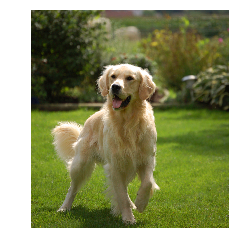

In [62]:
run_app(np.random.choice(dog_files, 1)[0])

Hello, human!


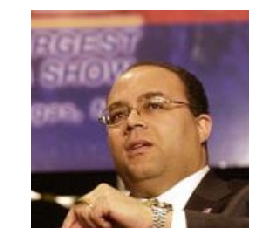

You look like a ...
Beagle


In [63]:
run_app(np.random.choice(human_files, 1)[0])

Sorry, I can be used only with images that contains a dog or a human!


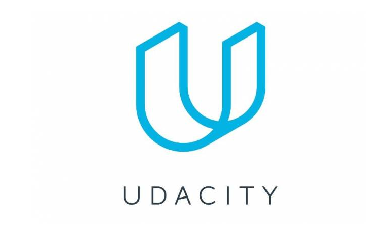

In [65]:
!wget -nc -q https://cache.olhardigital.com.br/uploads/acervo_imagens/2018/10/20181017101142_660_420.jpg
run_app("20181017101142_660_420.jpg")

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

The performance was better than I expected. The model didn't recognize the cat as a dog.

For improve the algorithm, some actions can be done:
*   Get more images of dogs and retrain the model
*   Train the algorithm more epochs (try to reduce the lerning rate)
*   Create a better model to detect human faces (the haars cascade can switched with a deep learning model with a better performance)





Hello, human!


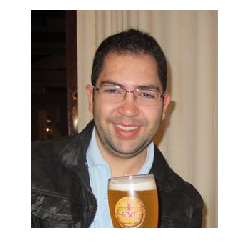

You look like a ...
Dogue de bordeaux

Hello, human!


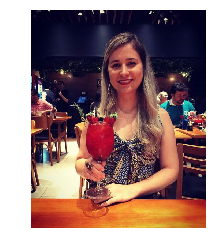

You look like a ...
Lowchen

Hello, dog!
Your predicted breed is ...
Labrador retriever


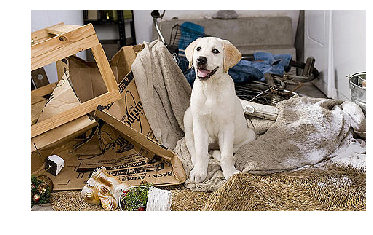


Hello, dog!
Your predicted breed is ...
Saint bernard


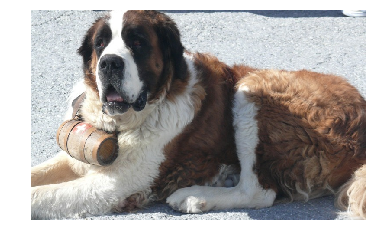


Sorry, I can be used only with images that contains a dog or a human!


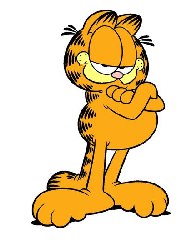


Sorry, I can be used only with images that contains a dog or a human!


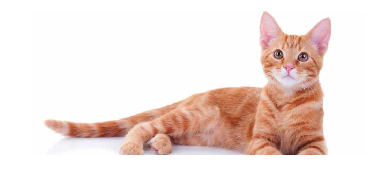

In [81]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

files = ['j.PNG', 'n.PNG', 'marley.jpg', 'saobern.jpg', 'garfield.jpg', 'cat.jpg']

## suggested code, below
for file in files:
    print('')
    run_app(file)